In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import lognorm, expon

In [2]:
np.random.seed(42)

# Preliminary fitted parameters using from the copula dependency prototype notebook.
severity_mu = 10 
severity_sigma = 0.5  

lambda_rate = 1/5  

n_simulations = 10_000


In [ ]:
total_disruption_costs = []

for _ in range(n_simulations):
    num_disruptions = np.random.poisson(5)
    disruption_severities = lognorm(s=severity_sigma, scale=np.exp(severity_mu)).rvs(num_disruptions)
    total_cost = np.sum(disruption_severities)
    total_disruption_costs.append(total_cost)

total_disruption_costs = np.array(total_disruption_costs)


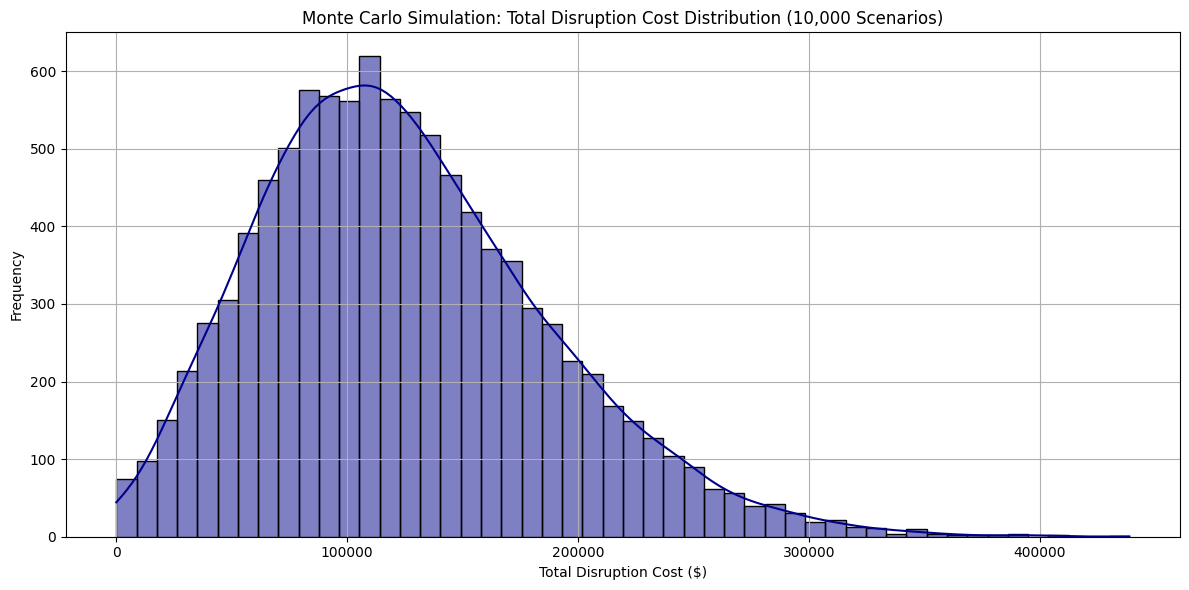

In [4]:
plt.figure(figsize=(12, 6))
sns.histplot(total_disruption_costs, bins=50, kde=True, color='darkblue')
plt.title("Monte Carlo Simulation: Total Disruption Cost Distribution (10,000 Scenarios)")
plt.xlabel("Total Disruption Cost ($)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


In [5]:
print("Summary Statistics for Total Disruption Cost (10,000 Simulations):")
print(f"Mean: ${total_disruption_costs.mean():,.2f}")
print(f"Median: ${np.median(total_disruption_costs):,.2f}")
print(f"95th Percentile: ${np.percentile(total_disruption_costs, 95):,.2f}")
print(f"99th Percentile: ${np.percentile(total_disruption_costs, 99):,.2f}")
print(f"Max: ${np.max(total_disruption_costs):,.2f}")


Summary Statistics for Total Disruption Cost (10,000 Simulations):
Mean: $124,481.48
Median: $117,204.71
95th Percentile: $238,919.89
99th Percentile: $297,054.64
Max: $438,870.40


### Explanation

- Graph: Shows the simulated distribution of total disruption costs across 10,000 scenarios, with a clear right-skew (long tail toward higher costs), indicating that while most outcomes cluster at moderate costs, extreme high-cost events are possible.
- Mean ($124,481.48): The average total disruption cost across all simulations, representing a typical expected value for planning.
- Median ($117,204.71): The midpoint of the distribution, showing that half of the scenarios cost less than this amount, slightly lower than the mean due to skewness.
- 95th Percentile ($238,919.89): Indicates that 95% of the scenarios cost less than about $239,000, useful for setting risk thresholds or contingency budgets.
- 99th Percentile ($297,054.64): Highlights the cost below which 99% of scenarios fall, capturing extreme but rare high-cost events to support stress-testing.
- Max ($438,870.40): The single highest cost observed in the 10,000 runs, illustrating the potential worst-case scenario that planners might consider for tail risk.